# Linear Regression

**This project aims to use python as an equivalent of the R Linear Regression project.**

The first step is to import some of the packages that will be used in the course of this project. 

In [1]:
# importing the needed packages
import warnings                     # Module to suppress warning                              
warnings.filterwarnings('ignore')   # Never display warnings which match
warnings.simplefilter("ignore")     # Filterwarnings(action, category=DeprecationWarning)

# Pandas and Numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)
                             

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

import sys  # This module gives access to system-specific parameters and functions
import os   # The OS module provides functions for interacting with the operating system

import glob # use to find files

In mathematics, regression is a statistical technique that is employed when the relationship between dependent variables and independent variables is considered. This process is used to determine if the changes in the dependent variables are connected with any of the independent variables.

**Linear regression**

This is the most commonly used type of predictive analysis. In simple terms, this is a linear (arranged along a straight line) approach for relationship modeling between two variables. The variables are always **dependent** and **independent**. It is important to note that the order of the variables matters. The independent variable belongs on the x-axis, while the dependent variable belongs on the y-axis.

There are two types of linear regression: 

i. Simple Linear Regression

ii. Multiple Linear Regression

The linear regression for two variables is based on the linear equation $y = mx + c$ where m and c are constants. 

The graph of a linear equation of the form above is a *straight line*. 

**Example** 
Plot the graph of $y = 2x + 6$ using the range -3 to 3. 

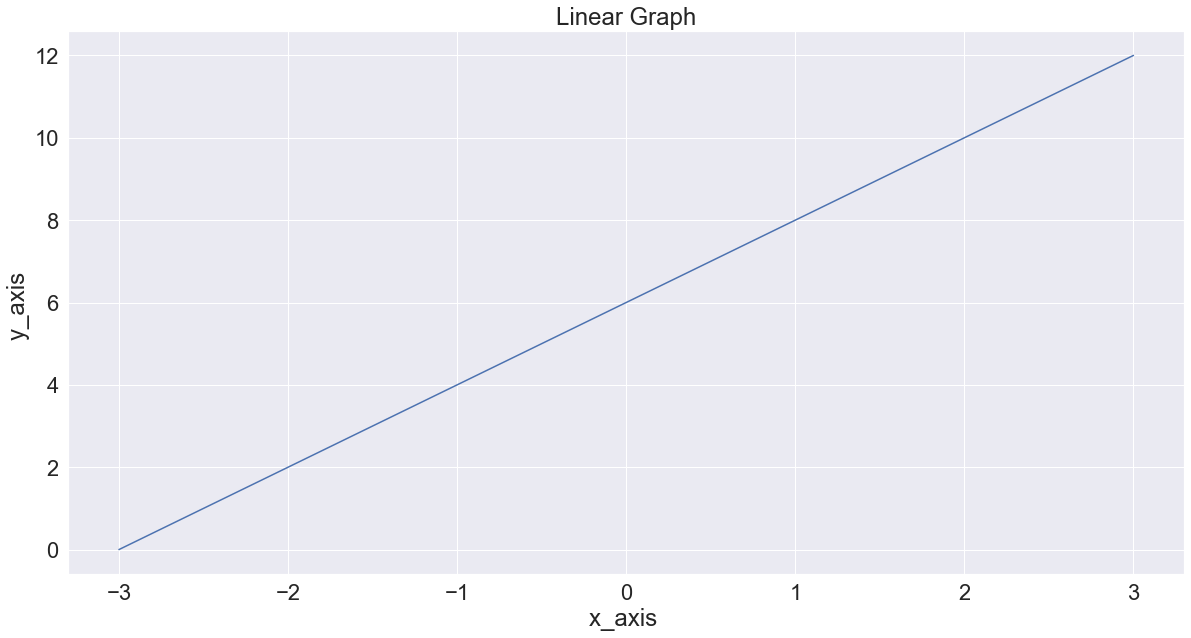

In [2]:
# define data values
x = np.array([-3, -2, -1, 0, 1, 2, 3])  # X-axis points
y = 2 * x + 6  # Y-axis points
  
plt.plot(x, y) # Plot the chart
plt.title('Linear Graph')
plt.xlabel('x_axis ')
plt.ylabel('y_axis ')
plt.show() # display

## How to perform Simple Linear Regression

The formula for linear regression is $y= b_1 X + b_0$. But in a more standard form, the complete linear regression model is: $$ y = b_1X + b_0 + \epsilon$$

where:

y is the predicted value 

$b_0$ is the intercept.

$b_1$ is the regression coefficient 

X is the independent variable 

$\epsilon$ is the error of the estimate.

The aim of linear regression is to find the line of best fit that goes through the data set. This is achieved by searching for $b_1$ the regression coefficient that will minimize the $\epsilon$ the error of the model.   



In the world of Data Science, *linear regression is an algorithm* that predicts the outcome from the linear relationship between the independent variables and dependent variables. From the foregoing, linear regression is classified as a supervised learning algorithm. 
There are some benefits to using linear regression
1. It is easily scalable.
2. It is easily implemented.
3. It is relatively straightforward.

The dataset for this example is available at the link: https://www.kaggle.com/datasets/karthickveerakumar/salary-data-simple-linear-regression?resource=download


In [3]:
# Reading in data into a dataframe 
data = pd.read_csv('salary.csv')

# Display top of dataframe
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
# Viewing the shape of the data.
data.shape

(30, 2)

In [5]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


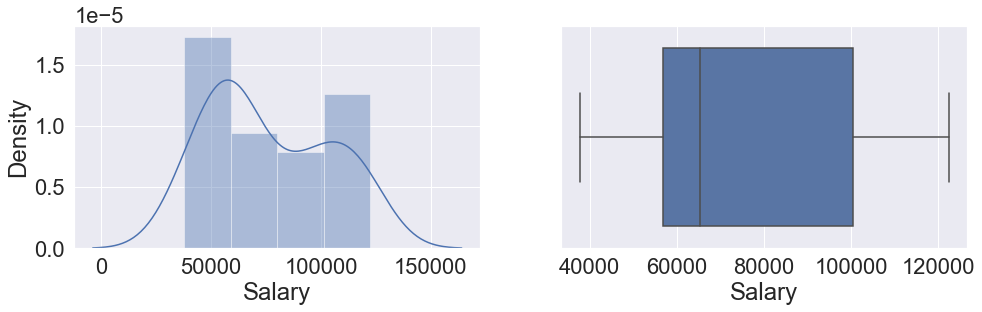

In [6]:
# viewing the salary column for outlier
plt.figure(figsize=(16,9))
plt.subplot(2,2,1)
sns.distplot(data['Salary']) 
plt.subplot(2,2,2)
sns.boxplot(data['Salary'])
plt.show()

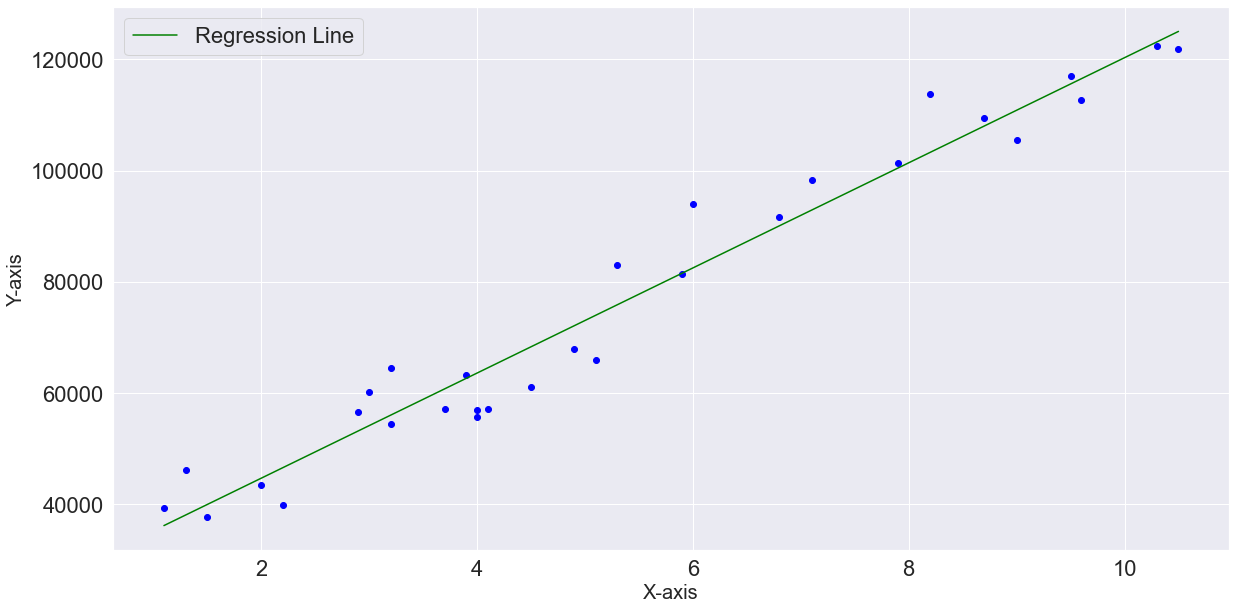

In [7]:
# Here is a scather plot with a regression line

plt.figure(figsize=(20, 10))
ax = plt.axes()
x = data["YearsExperience"]
y = data["Salary"]
plt.scatter(x, y, c ="blue")
ax.set_xlabel('X-axis', fontsize = 20)
ax.set_ylabel('Y-axis', fontsize = 20)

# obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

# adding linear regression line to scatterplot 

plt.plot(x, m*x+b, color='green', label='Regression Line')
plt.legend()
plt.show()

In [8]:
# Splitting the data into the training data and testing data
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [10]:
# regression coefficients or slope
print('Coefficients: ', regressor.coef_)

Coefficients:  [9423.81532303]


In [11]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(regressor.score(X_test, y_test)))

Variance score: 0.9024461774180497


In [12]:
print(f"intercept: {regressor.intercept_}")

intercept: 25321.583011776813


In [13]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

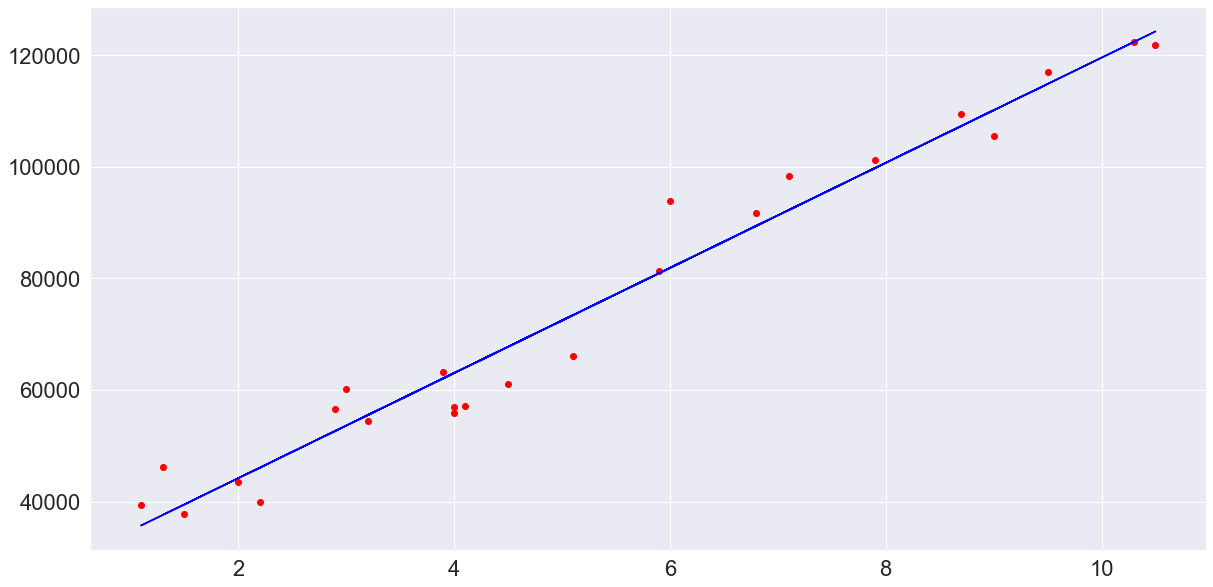

In [14]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

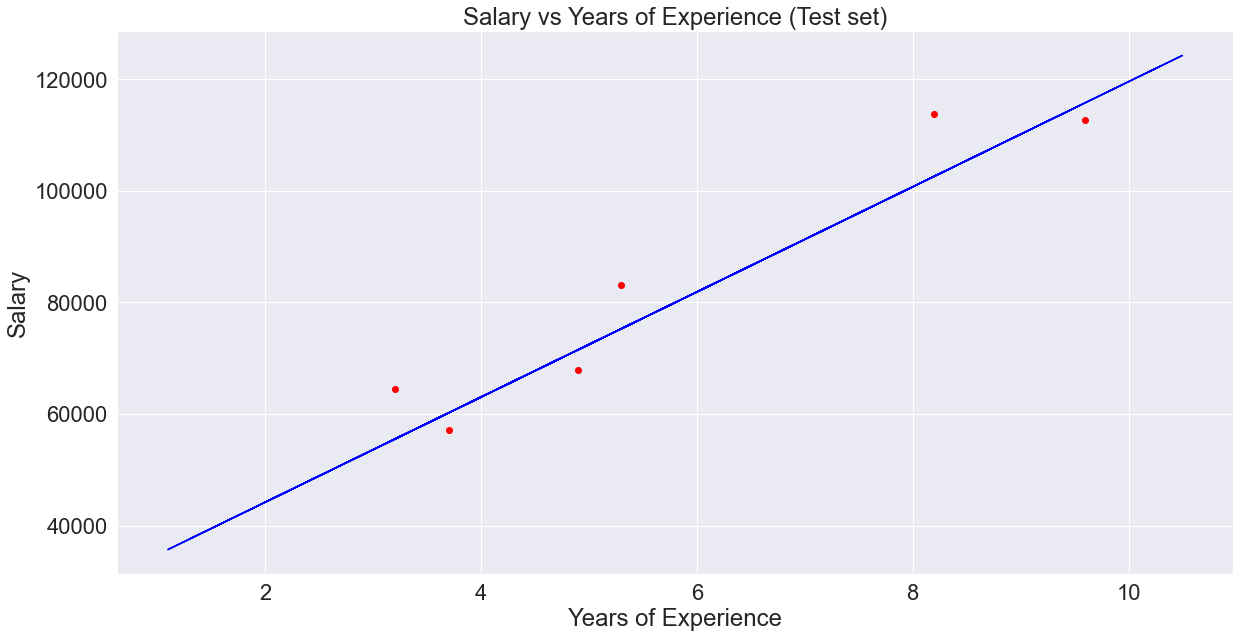

In [15]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Years of Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [16]:
r_sq = regressor.score(X, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.9564379197293564


#### Making Predictions

In [17]:
def calc(Coefficients, intercept, YearsExperience):
    return Coefficients*YearsExperience+intercept

score = calc(regressor.coef_, regressor.intercept_, 10.3)
print(score)

[122386.880839]


In [18]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

     Actual      Predicted
0  112635.0  115790.210113
1   67938.0   71498.278095
2  113812.0  102596.868661
3   83088.0   75267.804224
4   64445.0   55477.792045
5   57189.0   60189.699707


#### Evaluating the Model

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [20]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 6286.45
Mean squared error: 49830096.86
Root mean squared error: 7059.04


# Multiple Linear Regression

In [21]:
# Reading in data into a dataframe 
multi_data = pd.read_csv('petrol_consumption.csv')

# Display top of dataframe
multi_data.head() 

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [22]:
multi_data.shape 

(48, 5)

In [23]:
print(multi_data.describe().round(2).T)

                              count     mean      std      min      25%  \
Petrol_tax                     48.0     7.67     0.95     5.00     7.00   
Average_income                 48.0  4241.83   573.62  3063.00  3739.00   
Paved_Highways                 48.0  5565.42  3491.51   431.00  3110.25   
Population_Driver_licence(%)   48.0     0.57     0.06     0.45     0.53   
Petrol_Consumption             48.0   576.77   111.89   344.00   509.50   

                                  50%      75%       max  
Petrol_tax                       7.50     8.12     10.00  
Average_income                4298.00  4578.75   5342.00  
Paved_Highways                4735.50  7156.00  17782.00  
Population_Driver_licence(%)     0.56     0.60      0.72  
Petrol_Consumption             568.50   632.75    968.00  


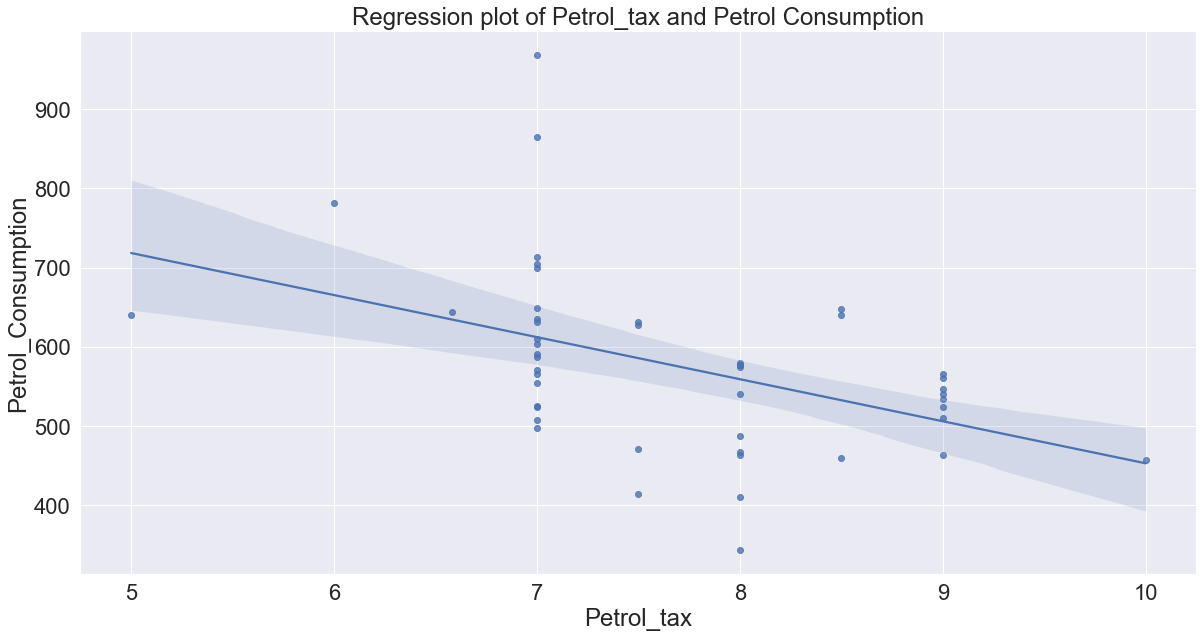

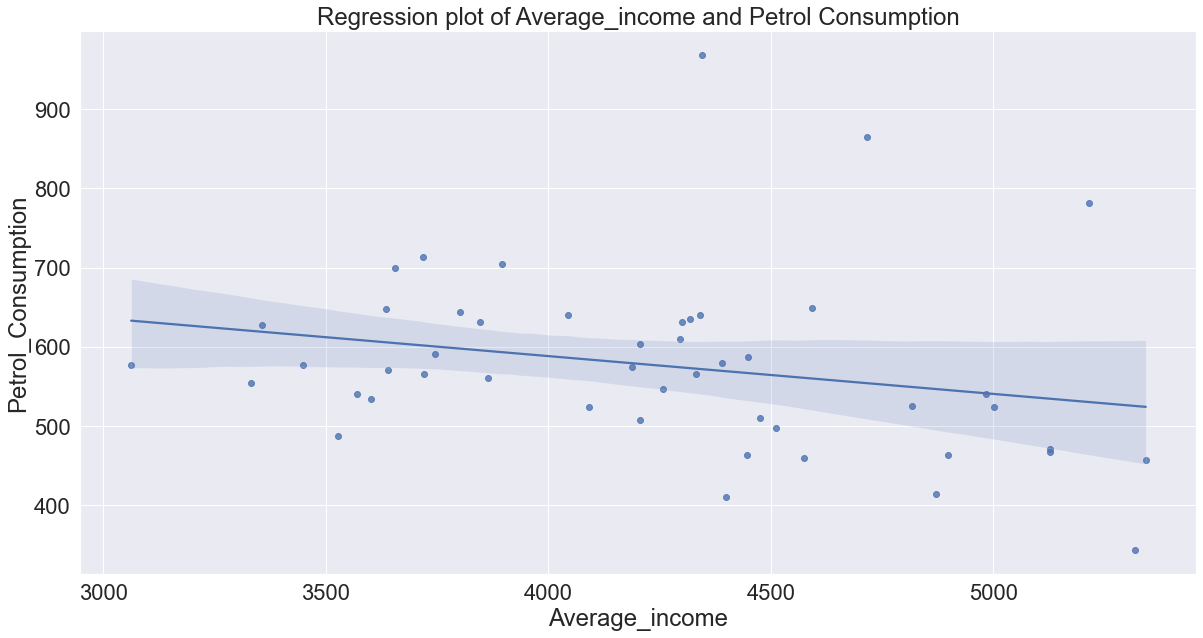

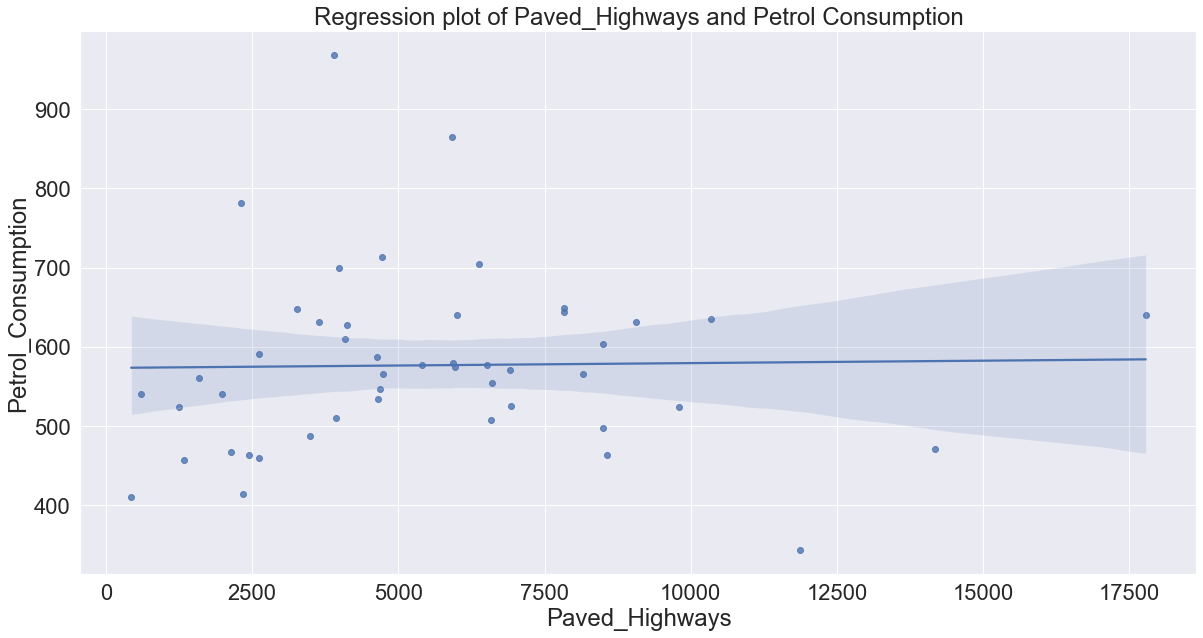

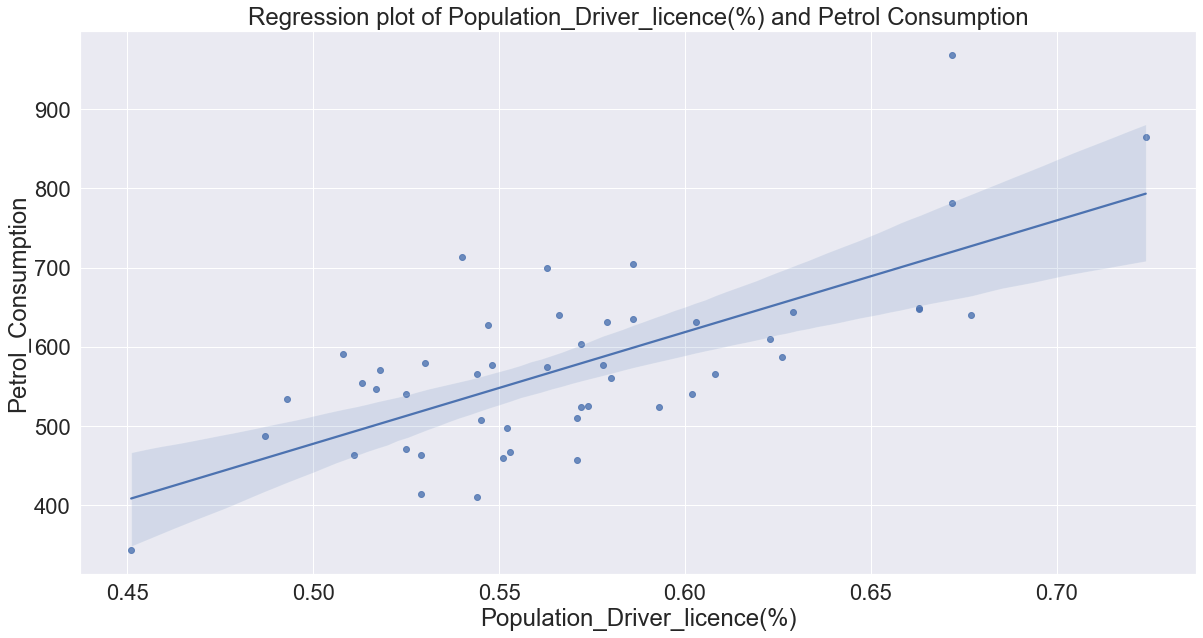

In [24]:
# Visualising the dataset

variables = ['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)']

for var in variables:
    plt.figure() 
    sns.regplot(x=var, y='Petrol_Consumption', data=multi_data).set(title=f'Regression plot of {var} and Petrol Consumption');

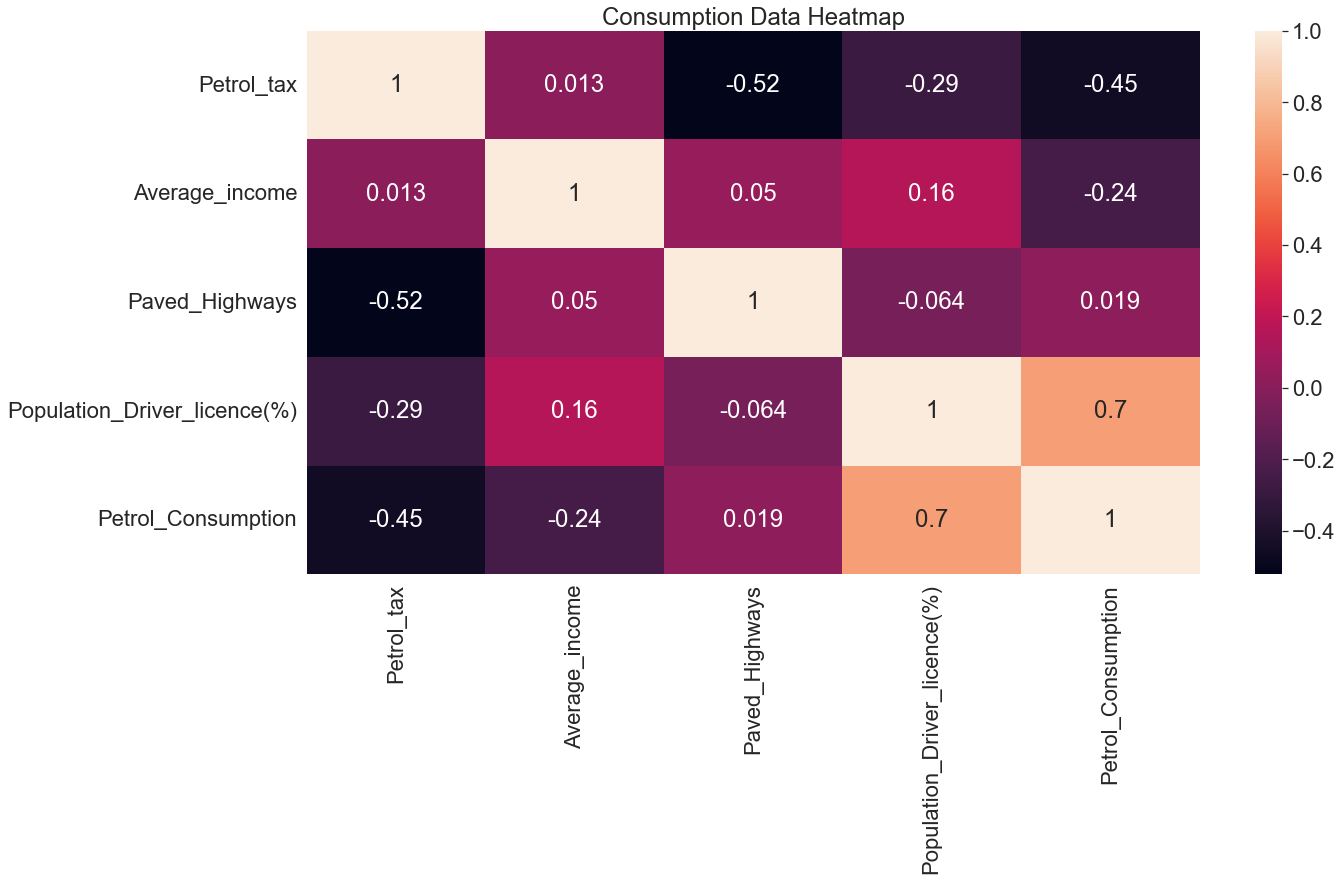

In [25]:
# Checking for the correlation
cor = multi_data.corr()
# annot=True displays the correlation values
sns.heatmap(cor, annot=True).set(title='Consumption Data Heatmap');

In [26]:
# Subsetting the data into dependent and independent variables. This will Seprate independent variable and target variable.
y = multi_data['Petrol_Consumption']
X = multi_data[['Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_tax']]  # The features

In [27]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2)

In [28]:
X.shape

(48, 4)

In [29]:
multi_regressor = LinearRegression()
multi_regressor.fit(X_train, y_train)

LinearRegression()

In [30]:
multi_regressor.intercept_

406.42685209198703

In [31]:
multi_regressor.coef_

array([-5.47452123e-02, -2.82660070e-03,  1.18327197e+03, -3.39897951e+01])

In [32]:
feature_names = X.columns

In [33]:
['Average_income', 'Paved_Highways', 'Population_Driver_licence(%)', 'Petrol_tax']

['Average_income',
 'Paved_Highways',
 'Population_Driver_licence(%)',
 'Petrol_tax']

In [34]:
feature_names = X.columns
model_coefficients = multi_regressor.coef_

coefficients_ddata = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])
print(coefficients_ddata)

                              Coefficient value
Average_income                        -0.054745
Paved_Highways                        -0.002827
Population_Driver_licence(%)        1183.271972
Petrol_tax                           -33.989795


In [35]:
y_pred = multi_regressor.predict(X_test)

In [36]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

    Actual   Predicted
40     587  652.552491
34     487  507.741863
42     632  636.332179
4      410  536.165990
29     534  473.590576
7      467  502.190661
43     591  557.199374
39     968  714.751228
33     628  603.325058
41     699  623.267907


In [37]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 69.98
Mean squared error: 9717.33
Root mean squared error: 98.58


In [38]:
actual_minus_predicted = sum((y_test - y_pred)**2)
actual_minus_actual_mean = sum((y_test - y_test.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)

R²: 0.554651593932699


In [39]:
multi_regressor.score(X_test, y_test)

0.554651593932699

In [40]:
multi_regressor.score(X_train, y_train)

0.731198922072672